In [1]:
import math
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

%matplotlib inline

# Useful directory path.
root_dir = f'{os.getcwd()}/../results'
graphics_dir = f'{root_dir}/graphics'

# GP tools.
tools = ('DEAP', 'TensorGP (CPU)', 'TensorGP (GPU)')

# Function sets.
function_sets = {
    'nicolau_a': (4, 7, 255, 2),
    'nicolau_b': (6, 5, 63, 1),
    'nicolau_c': (9, 5, 63, 1)
}

# Numbers of fitness cases.
num_fitness_cases = (10, 100, 1000, 10000)

# Program dictionary.
with open(f'{root_dir}/programs/programs.pkl', 'rb') as f:
    program_dict = pickle.load(f) 

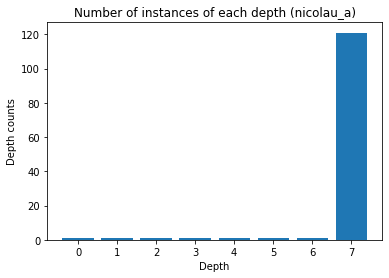

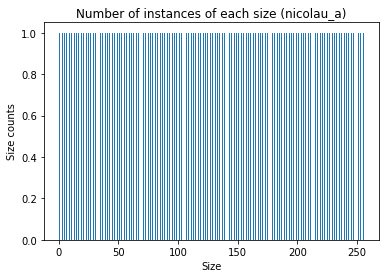

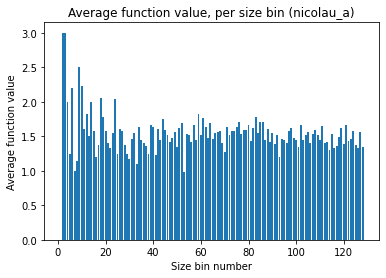

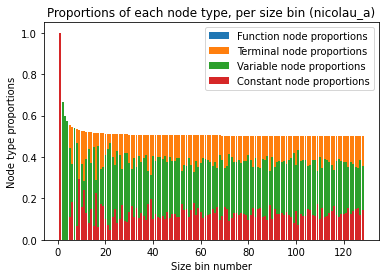

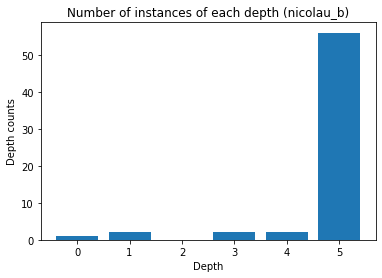

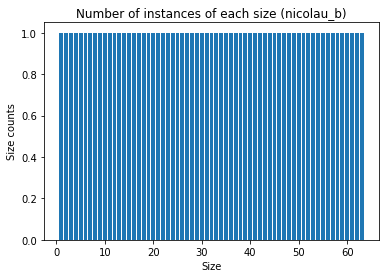

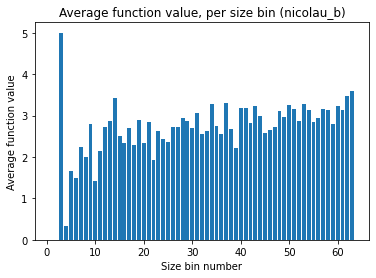

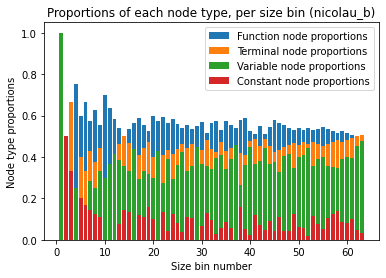

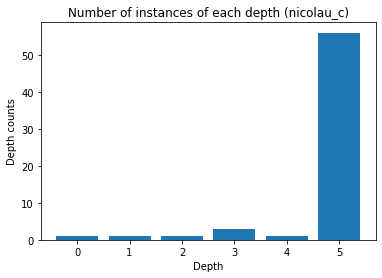

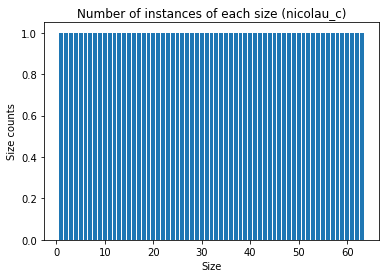

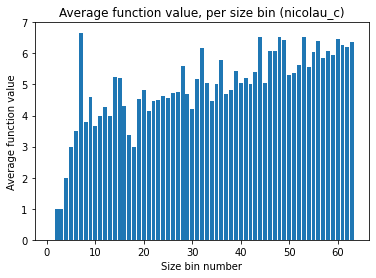

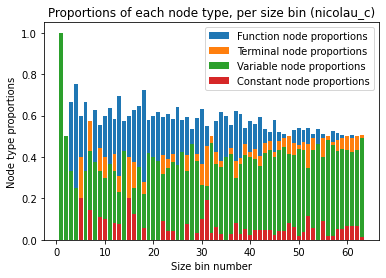

In [2]:
# Compute some statistics for the set of random programs
# generated for each function set.

# Program sizes for each size bin, for each function set.
program_sizes = []

for name, (num_functions, max_depth, max_size, bin_size) in (
    function_sets.items()):
    # For each function set...

    # Number of "size bins."
    num_size_bins = int(math.ceil(max_size/bin_size))

    # List where the `i`-th element, `0 <= i <= max_depth`, 
    # is to represent the number of instances for depth `i` 
    # over all random programs (i.e., from all size bins) 
    # for the function set with name `name`.
    depth_counts = [0]*(max_depth+1)

    # List where the `i`-th element, `0 <= i <= max_size-1`, 
    # is to represent the number of instances for size `i+1` 
    # over all random programs (i.e., from all size bins) 
    # for the function set with name `name`.
    size_counts = [0]*(max_size)

    # Lists where the `i`-th element contains the proportion
    # of the total number of nodes for size bin `i` that are 
    # functions/variables/constants/terminals.
    function_node_proportions = []
    variable_node_proportions = []
    constant_node_proportions = []
    terminal_node_proportions = []
    
    # List where the `i`-th element is to represent the 
    # "average function value" for size bin `i`, where 
    # this value is defined here to be the sum of the 
    # numbers of instances of each function type, with 
    # the `i`-th function type (specified by the `function_
    # counts` list) multiplied by `i`, all divided by the 
    # number of function types.
    #
    # In general, if the numbers of instances of function 
    # types are uniformly distributed for each size bin, 
    # the "average function value" as defined above should 
    # be equal to the number of function types minus one,
    # divided by 2. Thus, we can check for such uniformity
    # for each size bin by inspecting such an average value.
    average_function_values = []

    # Prepare for sizes related to the function set.
    program_sizes.append([])

    # Compute the relevant list elements.
    for (programs, depths, sizes, function_counts, 
        variable_counts, constant_counts) in (program_dict[name]
            [0:num_size_bins]):

        for depth in depths: depth_counts[depth] += 1
        for size in sizes: size_counts[size-1] += 1

        function_node_sum = sum(function_counts)
        variable_node_sum = sum(variable_counts)
        constant_node_sum = sum(constant_counts)
        terminal_node_sum = variable_node_sum + constant_node_sum
        node_sum = function_node_sum + terminal_node_sum

        function_node_proportions.append(function_node_sum/node_sum)
        variable_node_proportions.append(variable_node_sum/node_sum)
        constant_node_proportions.append(constant_node_sum/node_sum)
        terminal_node_proportions.append(terminal_node_sum/node_sum)
 
        average_function_value = (0) if (function_node_sum == 0) else (
            sum([i*function_counts[i] for i in range(
                num_functions)])/function_node_sum)

        average_function_values.append(average_function_value)

        # Add representative size from size bin.
        program_sizes[-1].append(sizes[0])

    # Compute/plot some relevant statistics for the number 
    # of instances of each possible program depth.

    # print('Program depths: ', depth_counts)
    # print('Mean of depth counts: ', np.mean(depth_counts))
    # print('Variance of depth counts: ', np.var(depth_counts))
    # print('Standard deviation of depth counts: ', np.std(depth_counts))
    # print(stats.chisquare(depth_counts))

    # Plot bar graph of depth counts.
    index = range(0, max_depth+1)
    plt.bar(index, depth_counts)
    plt.xlabel('Depth')
    plt.ylabel('Depth counts')
    plt.title('Number of instances of each depth ('+name+')')
    plt.savefig(f'{graphics_dir}/{name}/depths.svg')
    plt.show()


    # Compute/plot some relevant statistics for the number 
    # of instances of each possible program size.

    # print('Program sizes: ', size_counts)
    # print('Mean of size counts: ', np.mean(size_counts))
    # print('Variance of size counts: ', np.var(size_counts))
    # print('Standard deviation of size counts: ', np.std(size_counts))
    # print(stats.chisquare(size_counts))

    # Plot bar graph of size counts.
    index = range(1, max_size+1)
    plt.bar(index, size_counts)
    plt.xlabel('Size')
    plt.ylabel('Size counts')
    plt.title('Number of instances of each size ('+name+')')
    plt.savefig(f'{graphics_dir}/{name}/sizes.svg')
    plt.show()


    # Compute/plot some relevant statistics for the average
    # function values.

    # print('Average function values: ', average_function_values)
    # print('Mean of average function values: ', 
    #     np.mean(average_function_values))
    # print('Variance of average function values: ', 
    #     np.var(average_function_values))
    # print('Standard deviation of average function values: ', 
    #     np.std(average_function_values))
    # print(stats.chisquare(average_function_values))

    # Plot bar graph of average function values.
    index = range(1, num_size_bins+1)

    #log_approx = [4*(1/log(max_size,2))*log(max_size/x,2) + 
    #    10.5*(1/log(max_size,2))*log(x, 2) for x in index]

    #plt.plot(index, log_approx)
    plt.bar(index, average_function_values)

    plt.xlabel('Size bin number')
    plt.ylabel('Average function value')
    plt.title('Average function value, per size bin ('+name+')')
    plt.savefig(f'{graphics_dir}/{name}/average_function_values.svg')
    plt.show()


    # Compute/plot some relevant statistics for proportions
    # of the total number of nodes with particular node types.

    # print('Function node proportions: ', function_node_proportions)
    # print('Terminal node proportions: ', terminal_node_proportions)
    # print('Variable node proportions: ', variable_node_proportions)
    # print('Constant node proportions: ', constant_node_proportions)


    # Plot bar graph of function counts.
    index = range(1, num_size_bins+1)
    plt.bar(index, function_node_proportions, 
        label='Function node proportions')
    plt.bar(index, terminal_node_proportions, 
        label='Terminal node proportions')
    plt.bar(index, variable_node_proportions, 
        label='Variable node proportions')
    plt.bar(index, constant_node_proportions, 
        label='Constant node proportions')
    plt.xlabel('Size bin number')
    plt.ylabel('Node type proportions')
    plt.title('Proportions of each node type, per size bin ('+name+')')
    plt.legend(loc='upper right')
    plt.savefig(f'{graphics_dir}/{name}/node_proportions.svg')
    plt.show()

In [3]:
# Average of *median average runtimes* for each size bin,
# for each number of fitness cases, for each function set,
# for each tool.
avg_med_avg_runtimes = []

# Median of *median average runtimes* for each size bin,
# for each number of fitness cases, for each function set,
# for each tool.
med_med_avg_runtimes = []

# Minimum of *median average runtimes* for each size bin,
# for each number of fitness cases, for each function set,
# for each tool.
min_med_avg_runtimes = []

# Maximum of *median average runtimes* for each size bin,
# for each number of fitness cases, for each function set,
# for each tool.
max_med_avg_runtimes = []

# Standard deviation of *median average runtimes* for each size 
# bin, for each number of fitness cases, for each function set,
# for each tool.
std_dev_med_avg_runtimes = []

# Interquartile range of *median average runtimes* for each size 
# bin, for each number of fitness cases, for each function set,
# for each tool.
iqr_med_avg_runtimes = []

# Median node evaluations per second (NEPS) for each size bin,
# for each number of fitness cases, for each function set,
# for each tool.
med_neps = []

In [4]:
####################################################################

# Compute statistics for DEAP.

with open(f'{root_dir}/results_deap.pkl', 'rb') as f:
    med_avg_runtimes = pickle.load(f)

# Prepare for statistics related to the tool.
avg_med_avg_runtimes.append([])
med_med_avg_runtimes.append([])
min_med_avg_runtimes.append([])
max_med_avg_runtimes.append([])
std_dev_med_avg_runtimes.append([])
iqr_med_avg_runtimes.append([])
med_neps.append([])

for i, (name, (num_functions, max_depth, max_size, bin_size)) in enumerate(
    function_sets.items()):
    # For each function set...
    print(f'For function set `{name}`...')

    # Number of "size bins."
    num_size_bins = int(math.ceil(max_size/bin_size))

    # Prepare for statistics related to the function set.
    avg_med_avg_runtimes[-1].append([])
    med_med_avg_runtimes[-1].append([])
    min_med_avg_runtimes[-1].append([])
    max_med_avg_runtimes[-1].append([])
    std_dev_med_avg_runtimes[-1].append([])
    iqr_med_avg_runtimes[-1].append([])
    med_neps[-1].append([])

    for j, nfc in enumerate(num_fitness_cases):
        # For each number of fitness cases...
        print(f'For number of fitness cases `{nfc}`...')

        # Average of *median average runtimes* for each size bin,
        # relevant to the number of fitness cases.
        avg_med_avg_runtimes[-1][-1].append(
            [np.mean(med_avg_runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Averages of median average runtimes:', 
            avg_med_avg_runtimes[-1][-1][-1])
        print('\n')

        # Median of *median average runtimes* for each size bin,
        # relevant to the number of fitness cases.
        med_med_avg_runtimes[-1][-1].append(
            [np.median(med_avg_runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Medians of median average runtimes:', 
            med_med_avg_runtimes[-1][-1][-1])
        print('\n')

        # Minimum of *median average runtimes* for each size bin,
        # relevant to the number of fitness cases.
        min_med_avg_runtimes[-1][-1].append(
            [min(med_avg_runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Minimums of median average runtimes:', 
            min_med_avg_runtimes[-1][-1][-1])
        print('\n')

        # Maximum of *median average runtimes* for each size bin,
        # relevant to the number of fitness cases.
        max_med_avg_runtimes[-1][-1].append(
            [max(med_avg_runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Maximums of median average runtimes:', 
            max_med_avg_runtimes[-1][-1][-1])
        print('\n')

        # Standard deviation of *median average runtimes* for each size bin,
        # relevant to the number of fitness cases.
        std_dev_med_avg_runtimes[-1][-1].append(
            [np.std(med_avg_runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Standard deviations of median average runtimes:', 
            std_dev_med_avg_runtimes[-1][-1][-1])
        print('\n')

        # Interquartile range of *median average runtimes* for each size bin,
        # relevant to the number of fitness cases.
        iqr_med_avg_runtimes[-1][-1].append(
            [stats.iqr(med_avg_runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Interquartile range of median average runtimes:', 
            iqr_med_avg_runtimes[-1][-1][-1])
        print('\n\n')

        print('Program sizes:', program_sizes[i])

        # Median node evaluations per second for each size bin, 
        # relevant to the number of fitness cases.
        med_neps[-1][-1].append([((size * nfc) / med)
            for size, med in zip(
                program_sizes[i], med_med_avg_runtimes[-1][-1][-1])])
        print('Median node evaluations per second:', med_neps[-1][-1][-1])
        print('\n')

For function set `nicolau_a`...
For number of fitness cases `10`...
Averages of median average runtimes: [0.00026609282940626144, 0.0002780634288986524, 0.0002862342322866122, 0.0002946046491463979, 0.00030468155940373737, 0.00032212957739830017, 0.0003059099738796552, 0.00032947367678085965, 0.00036111163596312207, 0.00035959699501593906, 0.00036141804109017056, 0.0003734755640228589, 0.00037448698033889133, 0.00039463086674610776, 0.00039161865909894306, 0.0004019448533654213, 0.00040930478523174923, 0.00042864400893449783, 0.00043678438911835354, 0.00041979334006706875, 0.0004282329852382342, 0.00044295502205689746, 0.00045883872856696445, 0.0004641128083070119, 0.0004691847910483678, 0.00048385591556628543, 0.0004902329916755358, 0.00047826146086057025, 0.00048508836577335995, 0.000490119680762291, 0.0005151902635892233, 0.000505561629931132, 0.0005073091015219688, 0.0005276026204228401, 0.000535921814541022, 0.0005370331928133965, 0.0005384919544061025, 0.0005573801075418791, 0.00

In [5]:
####################################################################

# Compute statistics for TensorGP.

with open(f'{root_dir}/results_tensorgp.pkl', 'rb') as f:
    med_avg_runtimes = pickle.load(f)

for i, device in enumerate(('CPU', 'GPU')):
    # For each device...
    print(f'For device `{device}`...')

    # Prepare for statistics related to the tool.
    avg_med_avg_runtimes.append([])
    med_med_avg_runtimes.append([])
    min_med_avg_runtimes.append([])
    max_med_avg_runtimes.append([])
    std_dev_med_avg_runtimes.append([])
    iqr_med_avg_runtimes.append([])
    med_neps.append([])

    for j, (name, (num_functions, max_depth, max_size, bin_size)) in enumerate(
        function_sets.items()):
        # For each function set...
        print(f'For function set `{name}`...')

        # Number of "size bins."
        num_size_bins = int(math.ceil(max_size/bin_size))

        # Prepare for statistics related to the function set.
        avg_med_avg_runtimes[-1].append([])
        med_med_avg_runtimes[-1].append([])
        min_med_avg_runtimes[-1].append([])
        max_med_avg_runtimes[-1].append([])
        std_dev_med_avg_runtimes[-1].append([])
        iqr_med_avg_runtimes[-1].append([])
        med_neps[-1].append([])

        for k, nfc in enumerate(num_fitness_cases):
            # For each number of fitness cases...
            print(f'For number of fitness cases `{nfc}`...')


            # Average of *median average runtimes* for each size bin,
            # relevant to the number of fitness cases.
            avg_med_avg_runtimes[-1][-1].append(
                [np.mean(med_avg_runtimes[i][j][k][m]) 
                for m in range(num_size_bins)])
            print('Averages of median average runtimes:', 
                avg_med_avg_runtimes[-1][-1][-1])
            print('\n')

            # Median of *median average runtimes* for each size bin,
            # relevant to the number of fitness cases.
            med_med_avg_runtimes[-1][-1].append(
                [np.median(med_avg_runtimes[i][j][k][m]) 
                for m in range(num_size_bins)])
            print('Medians of median average runtimes:', 
                med_med_avg_runtimes[-1][-1][-1])
            print('\n')

            # Minimum of *median average runtimes* for each size bin,
            # relevant to the number of fitness cases.
            min_med_avg_runtimes[-1][-1].append(
                [min(med_avg_runtimes[i][j][k][m]) 
                for m in range(num_size_bins)])
            print('Minimums of median average runtimes:', 
                min_med_avg_runtimes[-1][-1][-1])
            print('\n')

            # Maximum of *median average runtimes* for each size bin,
            # relevant to the number of fitness cases.
            max_med_avg_runtimes[-1][-1].append(
                [max(med_avg_runtimes[i][j][k][m]) 
                for m in range(num_size_bins)])
            print('Maximums of median average runtimes:', 
                max_med_avg_runtimes[-1][-1][-1])
            print('\n')

            # Standard deviation of *median average runtimes* for each size bin,
            # relevant to the number of fitness cases.
            std_dev_med_avg_runtimes[-1][-1].append(
                [np.std(med_avg_runtimes[i][j][k][m]) 
                for m in range(num_size_bins)])
            print('Standard deviations of median average runtimes:', 
                std_dev_med_avg_runtimes[-1][-1][-1])
            print('\n')

            # Interquartile range of *median average runtimes* for each size bin,
            # relevant to the number of fitness cases.
            iqr_med_avg_runtimes[-1][-1].append(
                [stats.iqr(med_avg_runtimes[i][j][k][m]) 
                for m in range(num_size_bins)])
            print('Interquartile range of median average runtimes:', 
                iqr_med_avg_runtimes[-1][-1][-1])
            print('\n\n')

            print('Program sizes:', program_sizes[i])

            # Median node evaluations per second for each size bin, 
            # relevant to the number of fitness cases.
            med_neps[-1][-1].append([((size * nfc) / med)
                for size, med in zip(
                    program_sizes[j], med_med_avg_runtimes[-1][-1][-1])])
            print('Median node evaluations per second:', 
                med_neps[-1][-1][-1])
            print('\n')

For device `CPU`...
For function set `nicolau_a`...
For number of fitness cases `10`...
Averages of median average runtimes: [0.0004215085258086522, 0.000464067483941714, 0.0006078522031505903, 0.000648893415927887, 0.0006485730409622192, 0.0008298403893907865, 0.0005126676211754481, 0.0007166070863604546, 0.001260056160390377, 0.0011544190347194672, 0.0010177701090772946, 0.0011040130630135536, 0.0009851055219769478, 0.0014060248310367267, 0.0012531622002522151, 0.0013844985514879227, 0.0012655661751826603, 0.001686704655488332, 0.0019730556135376296, 0.0012322704618175824, 0.0013025843848784764, 0.0015155117337902386, 0.0017389794811606407, 0.0018152231350541115, 0.0017400669554869335, 0.0019181199992696445, 0.0021575860058267913, 0.0016705772529045741, 0.0018425279607375462, 0.0019240835681557655, 0.002872709184885025, 0.002232587585846583, 0.002390235041578611, 0.002282223664224148, 0.0025408739844957986, 0.002398545232911905, 0.0023791283989946046, 0.002978456517060598, 0.00315797

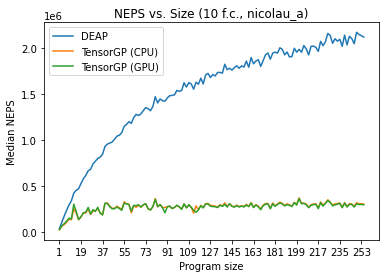

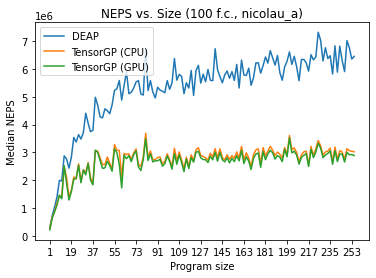

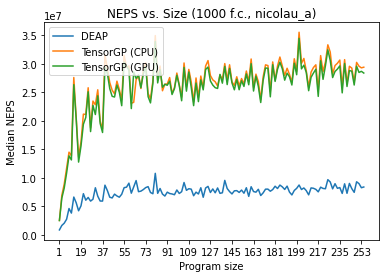

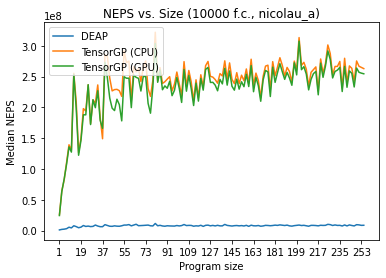

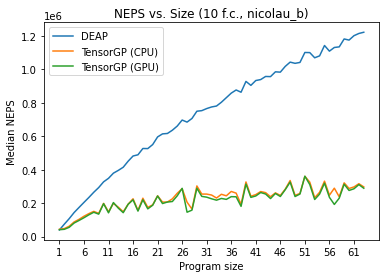

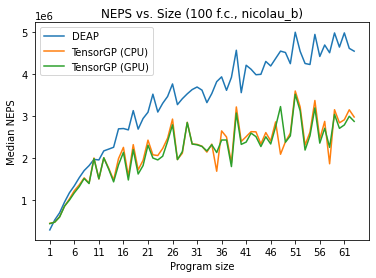

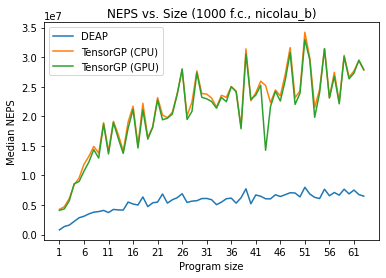

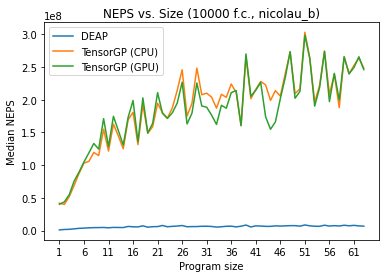

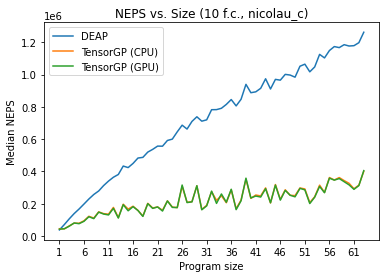

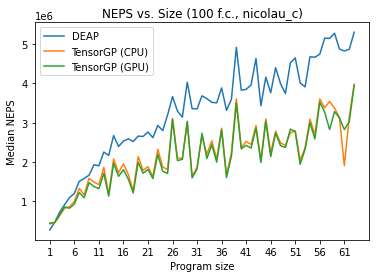

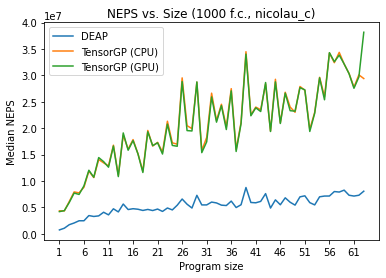

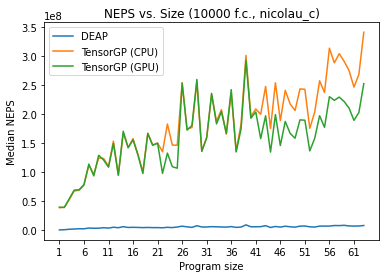

In [7]:
# Plot graph of median node evaluations per second for each tool, 
# for each number of fitness cases, for each function set.
for i, (name, (_, _, max_size, bin_size)) in enumerate(
    function_sets.items()):

    # Number of size bins.
    num_size_bins = int(math.ceil(max_size/bin_size))

    # Index range for plot.
    index = range(1, num_size_bins+1)

    for j, nfc in enumerate(num_fitness_cases):
        for t, tool in enumerate(tools):
            plt.plot(index, med_neps[t][i][j], label=f'{tool}')
        plt.xlabel('Program size')
        plt.xticks(index, [str(size) for size in program_sizes[i]])
        plt.locator_params(axis='x', nbins=15)
        plt.ylabel('Median NEPS')
        plt.title(f'NEPS vs. Size ({nfc} f.c., {name})')
        plt.legend(loc='upper left')
        plt.savefig(f'{graphics_dir}/{name}/median_neps_{nfc}.svg')
        plt.show()